# **ANÁLISE 1 - ENTREGA**

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import statistics 


# Loading the dataset

In [2]:
netflix_overall=pd.read_csv("netflix_titles.csv")

In [3]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

## Contagem do total de atores 

In [4]:
from collections import Counter


netflix_movies = netflix_movies.dropna(axis=0)
cast = netflix_movies['cast']


actors = []
temp = []


for i in cast:
    temp = i.split(",")
    for name in temp:
        actors.append(name)
        
actors_unique = Counter(actors).keys()  
print("atores sem repetição:",len(actors_unique))
print("atores com repetição:", len(actors))
#Counter(actors).values()



atores sem repetição: 19519
atores com repetição: 28508


In [5]:
netflix_movies = netflix_movies.reset_index(drop=True)

### Dividir os filmes por ano

In [6]:
netflix_movies['added_2017'] = False
netflix_movies['added_2018'] = False
netflix_movies['added_2019'] = False
for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2017'):
        netflix_movies['added_2017'][i] = True
    else:
        netflix_movies['added_2017'][i] = False

for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2018'):
        netflix_movies['added_2018'][i] = True
    else:
        netflix_movies['added_2018'][i] = False

for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2019'):
        netflix_movies['added_2019'][i] = True
    else:
        netflix_movies['added_2019'][i] = False

C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 

In [7]:
netflix_movies_2017 = netflix_movies[netflix_movies.added_2017 == True]
netflix_movies_2018 = netflix_movies[netflix_movies.added_2018 == True]
netflix_movies_2019 = netflix_movies[netflix_movies.added_2019 == True]

genre_2017 = netflix_movies_2017['listed_in']
genre_count_2017 = pd.Series(dict(Counter(','.join(genre_2017).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

genre_2018 = netflix_movies_2018['listed_in']
genre_count_2018 = pd.Series(dict(Counter(','.join(genre_2018).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

genre_2019 = netflix_movies_2019['listed_in']
genre_count_2019 = pd.Series(dict(Counter(','.join(genre_2019).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

In [8]:
# GMP 

genre_count_2017

International Movies        407
Dramas                      326
Comedies                    206
Independent Movies          126
Action & Adventure          116
Documentaries                98
Thrillers                    75
Romantic Movies              70
Children & Family Movies     66
Stand-Up Comedy              57
Music & Musicals             44
Horror Movies                36
Sports Movies                25
Sci-Fi & Fantasy             20
Anime Features               15
LGBTQ Movies                 11
Classic Movies                9
Cult Movies                   4
Faith & Spirituality          3
Movies                        2
dtype: int64

In [9]:
actors_and_genres2017 = netflix_movies_2017.iloc[:, [4, 10]]
actors_and_genres2018 = netflix_movies_2018.iloc[:, [4, 10]]
actors_and_genres2019 = netflix_movies_2019.iloc[:, [4, 10]]

In [10]:
actors_and_genres2017

cast  \
1     Nesta Cooper, Kate Walsh, John Michael Higgins...   
2     Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                       Fabrizio Copano   
4     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
5     Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
...                                                 ...   
3670  Abbie Cornish, Diego Klattenhoff, Justin Long,...   
3671  Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud...   
3672  Ana Polvorosa, Candela Peña, Macarena Gómez, C...   
3673  Alan Sabbagh, Julieta Zylberberg, Usher Barilk...   
3674  Mario Casas, Luis Tosar, José Sacristán, Claud...   

                                              listed_in  
1                                              Comedies  
2     International Movies, Sci-Fi & Fantasy, Thrillers  
3                                       Stand-Up Comedy  
4                         Action & Adventure, Thrillers  
5      Action & Adventure, Dramas, International Movies  
...                                                 ...  
3670            Dramas, International Movies, Thrillers  
3671  Action & Adventure, International Movies, Musi...  
3672                       Dramas, International Movies  
3673                       Dramas, International Movies  
3674            Dramas, International Movies, Thrillers  

[778 rows x 2 columns]

### Selecionar apenas gênero e atores por ano

In [11]:
network_2017_temp_actor = pd.concat([pd.Series(row['cast'], row['listed_in'].split(','))              
                    for _, row in actors_and_genres2017.iterrows()]).reset_index()

network_2017_temp_actor = network_2017_temp_actor.rename(columns={'index': 'categoria', 0: 'ator'})

network_2017_actor = pd.concat([pd.Series(row["categoria"], row['ator'].split(','))              
                    for _, row in network_2017_temp_actor.iterrows()]).reset_index()

network_2017_actor = network_2017_actor.rename(columns={'index': 'ator', 0: 'categoria'})

network_2017_actor

ator   categoria
0                Nesta Cooper    Comedies
1                  Kate Walsh    Comedies
2        John Michael Higgins    Comedies
3                Keith Powers    Comedies
4                 Alicia Sanz    Comedies
...                       ...         ...
13207          José Sacristán   Thrillers
13208           Claudia Canal   Thrillers
13209        José Manuel Poga   Thrillers
13210   Ingrid García Jonsson   Thrillers
13211           Luichi Macías   Thrillers

[13212 rows x 2 columns]

In [12]:
actor_genre_2017 = network_2017_actor.groupby('ator')['categoria'].apply(list).reset_index(name='genero')

actor_genre_2017    

ator                                             genero
0                  AJ Bowen       [Dramas,  Independent Movies,  LGBTQ Movies]
1              Aabhas Yadav  [Children & Family Movies,  Dramas,  Music & M...
2      Aaditya Pratap Singh  [Dramas,  Independent Movies,  International M...
3            Aakash Dabhade  [Action & Adventure,  Comedies,  International...
4               Aamir Ahmed  [Dramas,  International Movies,  Music & Music...
...                     ...                                                ...
4816                Zendaya              [Children & Family Movies,  Comedies]
4817           Zezé Polessa         [Comedies,  Dramas,  International Movies]
4818            Zizan Razak  [Comedies,  Horror Movies,  International Movies]
4819            Àlex Monner                    [Dramas,  International Movies]
4820          Álvaro Ogalla         [Comedies,  Dramas,  International Movies]

[4821 rows x 2 columns]

In [13]:
## GA

actor_2017 = netflix_movies_2017['cast']
actor_count_2017 = pd.Series(dict(Counter(','.join(actor_2017).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

actor_count_2017 = actor_count_2017.to_frame()

actor_count_2017.reset_index(level = 0, inplace = True)
actor_count_2017 = actor_count_2017.rename(columns={'index': 'ator', 0: 'GA'})

actor_count_2017['EA'] = actor_count_2017['GA'].apply(lambda x: 1/x)


variables = actor_count_2017.set_index('ator').join(actor_genre_2017.set_index('ator'))

variables.dropna()

GA        EA  \
ator                             
Shah Rukh Khan    14  0.071429   
Samuel West       11  0.090909   
Demet Akbağ        9  0.111111   
Akshay Kumar       8  0.125000   
Naseeruddin Shah   7  0.142857   
...               ..       ...   
Vinessa Shaw       1  1.000000   
Sonia Braga        1  1.000000   
Joel Courtney      1  1.000000   
Addison Timlin     1  1.000000   
Flavio Medina      1  1.000000   

                                                             genero  
ator                                                                 
Shah Rukh Khan    [Action & Adventure,  Dramas,  International M...  
Samuel West       [Documentaries,  International Movies, Documen...  
Demet Akbağ       [Comedies,  International Movies, Comedies,  I...  
Akshay Kumar      [Dramas,  International Movies,  Thrillers, In...  
Naseeruddin Shah  [Dramas,  Independent Movies,  International M...  
...                                                             ...  
Vinessa Shaw                            [Horror Movies,  Thrillers]  
Sonia Braga                         [Dramas,  International Movies]  
Joel Courtney                         [Dramas,  Independent Movies]  
Addison Timlin             [Comedies,  Dramas,  Independent Movies]  
Flavio Medina     [Dramas,  International Movies,  Romantic Movies]  

[658 rows x 3 columns]

In [14]:
network_2017_temp = pd.concat([pd.Series(row['listed_in'], row['cast'].split(','))              
                    for _, row in actors_and_genres2017.iterrows()]).reset_index()

network_2017_temp = network_2017_temp.rename(columns={'index': 'ator', 0: 'categoria'})

network_2017 = pd.concat([pd.Series(row["ator"], row['categoria'].split(','))              
                    for _, row in network_2017_temp.iterrows()]).reset_index()

network_2017 = network_2017.rename(columns={'index': 'categoria', 0: 'ator'})

### Limpando caractéres especiais

In [15]:
import unidecode


for i in range(len(network_2017['ator'])):
    if "'" in network_2017['ator'][i]:
        network_2017['ator'][i] = network_2017['ator'][i].replace("'", "")
    if '"' in network_2017['ator'][i]:
        network_2017['ator'][i] = network_2017['ator'][i].replace('"', "")
        
    network_2017['ator'][i] = unidecode.unidecode(network_2017['ator'][i])
    



### Código para criar o arquivo GML

In [124]:
import freeman as fm
import io

nodes1 = list(set(network_2017['ator']))
nodes2 = list(set(network_2017['categoria']))

temp_cat = []
temp_ator = []
temp_ator2 = []
edgeCheck = {}
listweights = []

with io.open("./network2.gml", "w") as f:
    f.write('graph [\n')
    f.write('  directed 0\n')

    for i in range(len(network_2017['ator'])):
        if not network_2017['ator'][i] in temp_ator:
            f.write('  node [\n')
            f.write('    id "{}"\n'.format(network_2017['ator'][i]))
            f.write('  ]\n')
            temp_ator.append(network_2017['ator'][i])
        
    for i in range(len(network_2017['categoria'])):
        if network_2017['categoria'][i][0] == ' ':
            network_2017['categoria'][i] = network_2017['categoria'][i][1:]
        if not network_2017['categoria'][i] in temp_cat:
            f.write('  node [\n')
            f.write('    id "{}"\n'.format(network_2017['categoria'][i]))
            f.write('  ]\n')
            temp_cat.append(network_2017['categoria'][i])
            
    for index, row in network_2017.iterrows():
        if row['categoria'][0] == ' ':
            keytemp = row['ator'] + ',' + row['categoria'][1:]
        else:
            keytemp = row['ator'] + ',' + row['categoria']
        
        if keytemp in edgeCheck:
            edgeCheck[keytemp] += 1
        else:
            edgeCheck[keytemp] = 1
            
    for key in edgeCheck:
        ator, categoria = key.split(',')
        weight = edgeCheck[key]
        if weight > 1:
            temp_ator2.append(ator)
            listweights.append(weight)
        
        f.write('  edge [\n')
        f.write('    source "{}"\n'.format(ator))
        f.write('    target "{}"\n'.format(categoria))
        f.write('    weight {}\n'.format(weight))
        f.write('  ]\n')  

    f.write(']\n')
        

In [125]:
print(genre_count_2017)

International Movies        407
Dramas                      326
Comedies                    206
Independent Movies          126
Action & Adventure          116
Documentaries                98
Thrillers                    75
Romantic Movies              70
Children & Family Movies     66
Stand-Up Comedy              57
Music & Musicals             44
Horror Movies                36
Sports Movies                25
Sci-Fi & Fantasy             20
Anime Features               15
LGBTQ Movies                 11
Classic Movies                9
Cult Movies                   4
Faith & Spirituality          3
Movies                        2
dtype: int64


In [126]:
g = fm.load('network2.gml')

In [127]:
length = len(listweights)
middle_index = length//2

first_half = listweights[:middle_index]

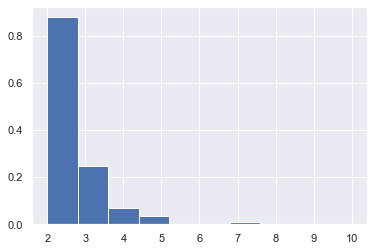

In [128]:
plt.hist(first_half, density = True)
plt.show()

### Criando a rede

In [129]:
g.label_nodes()
g.set_all_nodes(size=5, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))

In [130]:
g.draw()

Calculando a centralidade degree dos nós:

In [131]:
import networkx as nx
nx.degree_centrality(g)

{'Nesta Cooper': 0.00020665426741062204,
 ' Kate Walsh': 0.00020665426741062204,
 ' John Michael Higgins': 0.0008266170696424882,
 ' Keith Powers': 0.00020665426741062204,
 ' Alicia Sanz': 0.00020665426741062204,
 ' Jake Borelli': 0.00020665426741062204,
 ' Kid Ink': 0.00020665426741062204,
 ' Yousef Erakat': 0.00020665426741062204,
 ' Rebekah Graf': 0.00020665426741062204,
 ' Anne Winters': 0.00020665426741062204,
 ' Peter Gilroy': 0.00020665426741062204,
 ' Patrick Davis': 0.00020665426741062204,
 'Antonio Banderas': 0.0008266170696424882,
 ' Dylan McDermott': 0.0006199628022318662,
 ' Melanie Griffith': 0.0006199628022318662,
 ' Birgitte Hjort Sorensen': 0.0008266170696424882,
 ' Robert Forster': 0.0010332713370531101,
 ' Christa Campbell': 0.0006199628022318662,
 ' Tim McInnerny': 0.0006199628022318662,
 ' Andy Nyman': 0.0008266170696424882,
 ' David Ryall': 0.0006199628022318662,
 'Fabrizio Copano': 0.00020665426741062204,
 'James Franco': 0.0008266170696424882,
 ' Kate Hudson': 0

## Visualização dos nós

In [132]:
g.number_of_nodes()

4840

In [133]:
g.number_of_edges()

11827

In [134]:
import networkx as nx

nx.density(g)

0.001009958686225383

In [135]:
def load():
    g = fm.load('network2.gml')

    # Remover todas as arestas com peso menor ou igual a 0.5.
    # Precisamos de dois loops, pois não é uma boa ideia
    # tirar algo de um conjunto enquanto iteramos nele.
    removed = []
    for n, m in g.edges:
        if g.edges[n, m]['weight'] <= 2:
            removed.append((n, m))
    for n, m in removed:
        g.remove_edge(n, m)

    # Remover todos os nós que ficaram isolados depois da
    # remoção das arestas, para melhorar a visualização.
    removed = []
    for n in g.nodes:
        if not g.degree(n):
            removed.append(n)
    for n in removed:
        g.remove_node(n)

    return g

## Transformando em uma one-mode

In [136]:
#Construindo a rede one-mode do zero:
g1 = fm.Graph(nx.Graph())

In [137]:
#Adicionando todos os nós de usuário à rede one-mode:
for n in temp_ator2:
    g1.add_node(n)

In [138]:
from itertools import combinations
for n, m in combinations(g1.nodes, 2):

    # Muito cuidado para não usar g1 aqui!
    # Estamos analisando os vizinhos em g2.
    repos_n = set(g.neighbors(n))
    repos_m = set(g.neighbors(m))

    # Em sets é fácil calcular intersecção.
    weight = len(repos_n & repos_m)

    # Adicionamos só se weight for positivo.
    if weight > 0:
        g1.add_edge(n, m)
        g1.edges[n, m]['weight'] = weight

In [139]:
isolated = [n for n in g1.nodes if g1.degree(n) == 0]

for n in isolated:
    g1.remove_node(n)

In [140]:
weights = [g1.edges[n, m]['weight'] for n, m in g1.edges]

In [141]:
max(weights)

7

In [142]:
nx.write_gml(g1,'one_mode.gml')

## Métricas 

In [143]:
# CA (r) 

cluster = nx.clustering(g1)

In [144]:
cluster

{' Birgitte Hjort Sorensen': 0.9337280904188853,
 ' Robert Forster': 0.9522240332601044,
 ' Andy Nyman': 0.9522240332601044,
 ' Thomas Cocquerel': 0.9509883408891071,
 ' Louis Cancelmi': 0.9593816631130064,
 ' Kevin Bishop': 0.9462845859094008,
 ' Connie Nielsen': 0.9588845609479361,
 ' Peter Fonda': 0.9848493643698845,
 ' Alice Pol': 0.9338585226352992,
 ' So-ri Moon': 0.9388036507693318,
 ' Matthias Schoenaerts': 0.9645237067932307,
 ' Carmen Machi': 0.9388036507693318,
 ' Secun de la Rosa': 0.9388036507693318,
 ' Terele Pavez': 0.9388036507693318,
 ' Joaquin Climent': 0.9388036507693318,
 ' Keanu Reeves': 0.9723664746797596,
 ' Zoe Kravitz': 0.9964061813680469,
 ' Emory Cohen': 0.9546733154328091,
 ' Beau Knapp': 0.9595116607570123,
 ' Jason Mitchell': 0.9835205285512034,
 'Erica Lindbeck': 1.0,
 ' Shannon Chan-Kent': 0.8072044866264021,
 ' Kazumi Evans': 1.0,
 ' Claire Corlett': 1.0,
 ' Adrian Petriw': 1.0,
 ' Maryke Hendrikse': 1.0,
 ' Garry Chalk': 1.0,
 ' Nayyar Ejaz': 0.9338585

In [145]:
edgeCheck_genero = {}


for key in edgeCheck:
    ator, categoria = key.split(',')
    if ator in cluster.keys():
        edgeCheck_genero[key] = cluster[ator]


In [146]:
cluster_international = []
cluster_drama = []
cluster_comedies = []
cluster_independent = []
cluster_action = []
cluster_documentaries = []
cluster_thrillers = []
cluster_romantic = []
cluster_children = []
cluster_stand_up = []
cluster_music = []
cluster_horror = []
cluster_sports = []
cluster_scifi = []
cluster_anime = []
cluster_LGBTQ = []
cluster_classic = []
cluster_cult = []
cluster_faith = []
cluster_movies = []

for key in edgeCheck_genero:
    ator, categoria = key.split(',')
    if categoria == genre_count_2017.keys()[0]:
        cluster_international.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[1]:
        cluster_drama.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[2]:
        cluster_comedies.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[3]:
        cluster_independent.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[4]:
        cluster_action.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[5]:
        cluster_documentaries.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[6]:
        cluster_thrillers.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[7]:
        cluster_romantic.append(edgeCheck_genero[key])
    
    elif categoria == genre_count_2017.keys()[8]:
        cluster_children.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[9]:
        cluster_stand_up.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[10]:
        cluster_music.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[11]:
        cluster_horror.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[12]:
        cluster_sports.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[13]:
        cluster_scifi.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[14]:
        cluster_anime.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[15]:
        cluster_LGBTQ.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[16]:
        cluster_classic.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[17]:
        cluster_cult.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[18]:
        cluster_faith.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[19]:
        cluster_movies.append(edgeCheck_genero[key])
    
    else:
        print("deu errado", key)

In [147]:
cluster_international_mean = statistics.mean(cluster_international)
cluster_drama_mean = statistics.mean(cluster_drama)
cluster_comedies_mean = statistics.mean(cluster_comedies)
cluster_independent_mean = statistics.mean(cluster_independent)
cluster_action_mean = statistics.mean(cluster_action)
cluster_documentaries_mean = statistics.mean(cluster_documentaries)
cluster_thrillers_mean = statistics.mean(cluster_thrillers)
cluster_romantic_mean = statistics.mean(cluster_romantic)
cluster_children_mean = statistics.mean(cluster_children)
cluster_stand_up_mean = 0
# = statistics.mean(cluster_stand_up)
cluster_music_mean = statistics.mean(cluster_music)
cluster_horror_mean = statistics.mean(cluster_horror)
cluster_sports_mean = statistics.mean(cluster_sports)
cluster_scifi_mean = statistics.mean(cluster_scifi)
cluster_anime_mean = statistics.mean(cluster_anime)
cluster_LGBTQ_mean = statistics.mean(cluster_LGBTQ)
cluster_classic_mean = statistics.mean(cluster_classic)
cluster_cult_mean = statistics.mean(cluster_cult)
#cluster_faith_mean = statistics.mean(cluster_faith)
#cluster_movies_mean = statistics.mean(cluster_movies)

In [148]:
# identificando os atores que tem relação entre si

for n in g1.nodes:
    for m in g1.neighbors(n):
        if cluster[n] == 1:
            print(n, m)

Erica Lindbeck  Shannon Chan-Kent
Erica Lindbeck  Kazumi Evans
Erica Lindbeck  Claire Corlett
Erica Lindbeck  Adrian Petriw
Erica Lindbeck  Maryke Hendrikse
Erica Lindbeck  Garry Chalk
Erica Lindbeck  Mike Birbiglia
Erica Lindbeck  Bella Thorne
Erica Lindbeck  Randall Park
Erica Lindbeck  Saurabh Shukla
Erica Lindbeck Kelly Sheridan
Erica Lindbeck  Tabitha St. Germain
Erica Lindbeck  Nicole Oliver
Erica Lindbeck  Britt Irvin
Erica Lindbeck  Rebecca Husain
Erica Lindbeck  Kira Tozer
Erica Lindbeck  Chiara Zanni
Erica Lindbeck  Bethany Brown
Erica Lindbeck  Michael Dobson
Erica Lindbeck  Peter Kelamis
Erica Lindbeck  Ingrid Nilson
Erica Lindbeck  Dwight Schultz
Erica Lindbeck Diana Kaarina
Erica Lindbeck  Cassandra Morris
Erica Lindbeck  Kate Higgins
Erica Lindbeck  Brittney Wilson
Erica Lindbeck  Cathy Weseluck
Erica Lindbeck  Vincent Tong
Erica Lindbeck  Alyssya Swales
Erica Lindbeck  Lili Beaudoin
Erica Lindbeck  Frank Langella
Erica Lindbeck  Alfred Molina
Erica Lindbeck  John Rhys-D

 Nicole Oliver Lina Larissa Strahl
 Nicole Oliver  Lisa-Marie Koroll
 Nicole Oliver  Louis Held
 Nicole Oliver  Michael Maertens
 Nicole Oliver  Martin Seifert
 Nicole Oliver  Charly Hubner
 Nicole Oliver  Winnie Bowe
 Nicole Oliver  Fabian Buch
 Nicole Oliver  Max von der Groeben
 Britt Irvin Erica Lindbeck
 Britt Irvin  Shannon Chan-Kent
 Britt Irvin  Kazumi Evans
 Britt Irvin  Claire Corlett
 Britt Irvin  Adrian Petriw
 Britt Irvin  Maryke Hendrikse
 Britt Irvin  Garry Chalk
 Britt Irvin  Mike Birbiglia
 Britt Irvin  Bella Thorne
 Britt Irvin  Randall Park
 Britt Irvin  Saurabh Shukla
 Britt Irvin Kelly Sheridan
 Britt Irvin  Tabitha St. Germain
 Britt Irvin  Nicole Oliver
 Britt Irvin  Rebecca Husain
 Britt Irvin  Kira Tozer
 Britt Irvin  Chiara Zanni
 Britt Irvin  Bethany Brown
 Britt Irvin  Michael Dobson
 Britt Irvin  Peter Kelamis
 Britt Irvin  Ingrid Nilson
 Britt Irvin  Dwight Schultz
 Britt Irvin Diana Kaarina
 Britt Irvin  Cassandra Morris
 Britt Irvin  Kate Higgins
 Britt 

 Cassandra Morris  Erin Fitzgerald
 Cassandra Morris  Laura Bailey
 Cassandra Morris  Troy Baker
 Cassandra Morris  Keith David
 Cassandra Morris  Neal Huff
 Cassandra Morris  Makrand Deshpande
 Cassandra Morris  Kathy Bates
 Cassandra Morris Jonny Gray
 Cassandra Morris  Callan Potter
 Cassandra Morris  Peter Keleghan
 Cassandra Morris  Kiana Madeira
 Cassandra Morris  Caroline Rhea
 Cassandra Morris  Jeffrey Tambor
 Cassandra Morris  Molly Shannon
 Cassandra Morris  Adam Tuominen
 Cassandra Morris  Emily Morris
 Cassandra Morris  Fred Tatasciore
 Cassandra Morris  Kevin OGrady
 Cassandra Morris  Emilia McCarthy
 Cassandra Morris  Kim Coates
 Cassandra Morris Lina Larissa Strahl
 Cassandra Morris  Lisa-Marie Koroll
 Cassandra Morris  Louis Held
 Cassandra Morris  Michael Maertens
 Cassandra Morris  Martin Seifert
 Cassandra Morris  Charly Hubner
 Cassandra Morris  Winnie Bowe
 Cassandra Morris  Fabian Buch
 Cassandra Morris  Max von der Groeben
 Kate Higgins Erica Lindbeck
 Kate Higgi

 Erin Fitzgerald  Kira Tozer
 Erin Fitzgerald  Chiara Zanni
 Erin Fitzgerald  Bethany Brown
 Erin Fitzgerald  Michael Dobson
 Erin Fitzgerald  Peter Kelamis
 Erin Fitzgerald  Ingrid Nilson
 Erin Fitzgerald  Dwight Schultz
 Erin Fitzgerald Diana Kaarina
 Erin Fitzgerald  Cassandra Morris
 Erin Fitzgerald  Kate Higgins
 Erin Fitzgerald  Brittney Wilson
 Erin Fitzgerald  Cathy Weseluck
 Erin Fitzgerald  Vincent Tong
 Erin Fitzgerald  Alyssya Swales
 Erin Fitzgerald  Lili Beaudoin
 Erin Fitzgerald  Frank Langella
 Erin Fitzgerald  Alfred Molina
 Erin Fitzgerald  John Rhys-Davies
 Erin Fitzgerald  Debi Derryberry
 Erin Fitzgerald  Salli Saffioti
 Erin Fitzgerald  Evan Smith
 Erin Fitzgerald  Laura Bailey
 Erin Fitzgerald  Troy Baker
 Erin Fitzgerald  Keith David
 Erin Fitzgerald  Neal Huff
 Erin Fitzgerald  Makrand Deshpande
 Erin Fitzgerald  Kathy Bates
 Erin Fitzgerald Jonny Gray
 Erin Fitzgerald  Callan Potter
 Erin Fitzgerald  Peter Keleghan
 Erin Fitzgerald  Kiana Madeira
 Erin Fitzger

### Regressão Linear entre a média dos cluster e a popularidade dos gêneros

In [149]:
cluster_mean = []
cluster_mean.extend((cluster_international_mean, cluster_drama_mean,cluster_comedies_mean,cluster_independent_mean, 
                     cluster_action_mean, cluster_documentaries_mean, cluster_thrillers_mean, cluster_romantic_mean, 
                     cluster_children_mean, cluster_stand_up_mean, cluster_music_mean, cluster_horror_mean, cluster_sports_mean,
                     cluster_scifi_mean, cluster_anime_mean, cluster_LGBTQ_mean, cluster_classic_mean, cluster_cult_mean, 
                     cluster_faith_mean, cluster_movies_mean))

print(len(cluster_mean))
movies_count = []
for i in range(0, len(genre_count_2017)):
    movies_count.append(genre_count_2017[i])
print(len(movies_count))

20
20


In [150]:
import pandas as pd

import statsmodels.api as sm

lin_reg = sm.OLS(cluster_mean, movies_count)
result = lin_reg.fit()
result.summary()

C:\Users\giova\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning:

invalid value encountered in greater



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.388
Model:                            OLS   Adj. R-squared (uncentered):              0.355
Method:                 Least Squares   F-statistic:                              12.02
Date:                Fri, 13 Nov 2020   Prob (F-statistic):                     0.00258
Time:                        17:53:45   Log-Likelihood:                         -21.507
No. Observations:                  20   AIC:                                      45.01
Df Residuals:                      19   BIC:                                      46.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0041      0.001      3.468      0.003       0.002       0.007
==============================================================================
Omnibus:                        9.744   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                7.387
Skew:                          -1.420   Prob(JB):                       0.0249
Kurtosis:                       3.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste de hipótese (teste-t)

In [151]:
from scipy.stats import ttest_ind
from scipy import stats

# Function which returns subset or r length from n 
from itertools import combinations 

arr = [cluster_international,cluster_drama,cluster_comedies,cluster_independent,cluster_action,cluster_documentaries,
       cluster_thrillers,cluster_romantic,cluster_children,cluster_stand_up,cluster_music,cluster_horror,cluster_sports,
       cluster_scifi,cluster_anime,cluster_LGBTQ,cluster_classic,cluster_cult,cluster_faith,cluster_movies]

indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

def rSubset(arr, r): 
    # return list of all subsets of length r 
    # to deal with duplicate subsets use 
    # set(list(combinations(arr, r))) 
    return list(combinations(arr, r)) 

dupla_clusters = rSubset(arr, 2)
p_valor_bom = 0
p_valor_ruim = 0

for each in dupla_clusters:
    if ttest_ind(each[0], each[1])[1] <= 0.05:
        
        p_valor_bom += 1
    else:
        p_valor_ruim +=1
        
print(p_valor_bom)
print(p_valor_ruim)

67
123


C:\Users\giova\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\giova\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\giova\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



### Começando análise dos resultados

In [152]:
indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

dupla_indexes = rSubset(indexes, 2)
p_valor_bom = 0
p_valor_ruim = 0

for i in range(len(dupla_indexes)):
    if ttest_ind(arr[dupla_indexes[i][0]], arr[dupla_indexes[i][1]])[1] <= 0.05:
        print("Duplas com P-valor bom: ", genre_count_2017.keys()[dupla_indexes[i][0]], "e", genre_count_2017.keys()[dupla_indexes[i][1]])
        p_valor_bom += 1
    else:
        print("Duplas com P-valor ruim: ", genre_count_2017.keys()[dupla_indexes[i][0]], "e", genre_count_2017.keys()[dupla_indexes[i][1]])
        p_valor_ruim +=1
        
print(p_valor_bom)
print(p_valor_ruim)


C:\Users\giova\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\giova\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\giova\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



Duplas com P-valor bom:  International Movies e Dramas
Duplas com P-valor bom:  International Movies e Comedies
Duplas com P-valor ruim:  International Movies e Independent Movies
Duplas com P-valor ruim:  International Movies e Action & Adventure
Duplas com P-valor ruim:  International Movies e Documentaries
Duplas com P-valor bom:  International Movies e Thrillers
Duplas com P-valor bom:  International Movies e Romantic Movies
Duplas com P-valor bom:  International Movies e Children & Family Movies
Duplas com P-valor ruim:  International Movies e Stand-Up Comedy
Duplas com P-valor bom:  International Movies e Music & Musicals
Duplas com P-valor ruim:  International Movies e Horror Movies
Duplas com P-valor ruim:  International Movies e Sports Movies
Duplas com P-valor bom:  International Movies e Sci-Fi & Fantasy
Duplas com P-valor bom:  International Movies e Anime Features
Duplas com P-valor ruim:  International Movies e LGBTQ Movies
Duplas com P-valor bom:  International Movies e 

Duplas com P-valor ruim:  LGBTQ Movies e Classic Movies
Duplas com P-valor ruim:  LGBTQ Movies e Cult Movies
Duplas com P-valor ruim:  LGBTQ Movies e Faith & Spirituality
Duplas com P-valor ruim:  LGBTQ Movies e Movies
Duplas com P-valor ruim:  Classic Movies e Cult Movies
Duplas com P-valor ruim:  Classic Movies e Faith & Spirituality
Duplas com P-valor ruim:  Classic Movies e Movies
Duplas com P-valor ruim:  Cult Movies e Faith & Spirituality
Duplas com P-valor ruim:  Cult Movies e Movies
Duplas com P-valor ruim:  Faith & Spirituality e Movies
67
123
